Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variable/s. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical. Logistic Regression is a supervised machine learning algorithm/model.

**Agenda**
- About Dataset
- Loading Libraries
- Loading Data
- Understanding Data
- Separating Input/Independent and Output/Dependent Variables
- Splitting the data
- Building Model
- Prediction
- Model Performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# In read_csv() function, we have passed the raw data link at github
data_location = "https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv"
data = pd.read_csv(data_location)

In [3]:
data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


Since our target variable has only two different classes/values, we can say it as a binary classification problem. And Logistic Regression is used for binary classification problems.

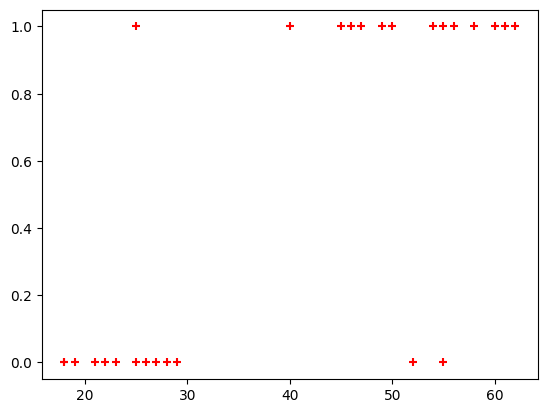

In [4]:
plt.scatter(data.age,data.bought_insurance,marker='+',color='red')

easily observe from the scatter plot that generally the customer who is of age less than 30 years has not bought the insurance.

### Separating Input and Output Variables

In [5]:
X = data[['age']] # input variable

y = data['bought_insurance'] # output variable

two square brackets while taking input variables and only one square bracket while taking output variable. 

All machine learning algorithm accepts input variables as a 2D array and output variable as 1D array. Using two square brackets while selecting the input variables gives you the shape of input variable/s as 2D, but if you use only one square bracket, the shape will be 1D as you can see in the case of y.

In [6]:
print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (27, 1) Dimension:  2
Shape:  (27,) Dimension:  1


### Splitting the data into Train and Test Set

training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

In [7]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [8]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# X_train: independent/input feature data for training the model
# y_train: dependent/output feature data for training the model
# X_test: independent/input feature data for testing the model; will be used to predict the output values
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

### Building Model

import our model - Logistic Regression (again, using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

In [9]:
# import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [10]:
log_model = LogisticRegression()
# Fit the model
log_model.fit(X_train, y_train)

LogisticRegression()

### Prediction

Now logistic regression model (i.e. log_model) is trained using X_train and y_trian data. Let's predict the target value (i.e. bought_insurance) for the X_test data. We use "predict()" method for prediction.

In [11]:
predictions = log_model.predict(X_test)

We already have actual target values (i.e. y_test) for X_test. Let's compare y_test and the predicted value for X_test by our log_model.

In [12]:
y_test.values

array([1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [13]:
predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

There is one person who had actually bought insurance but our model predicted that the person had not bought insurance. So, there is one misclassified data by our model.

### Model Performance

<AxesSubplot: >

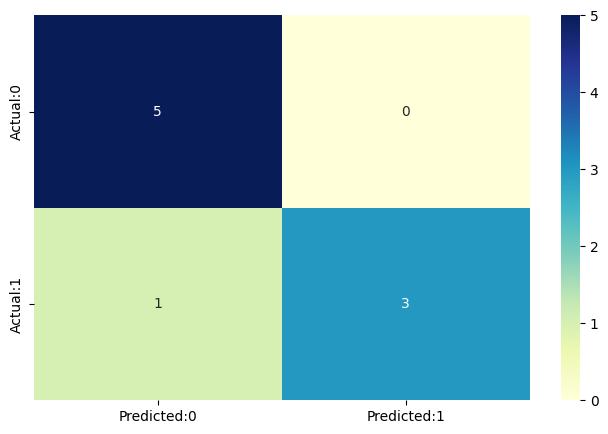

In [15]:
# The confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [16]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel() # ravel() will convert the 2D numpy array into 1D.
print(tn, fp, fn, tp)

5 0 1 3


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8888888888888888

Why accuracy score?

Accuracy is a great measure when you have symmetric datasets where values of false positive and false negatives are almost same. As you can see the confusion matrix above, false positives (fp = 0) and false negatives (fn = 1) are almost same. So here accuracy score is the best measure.

model is predicting 88.9% correct results.